# Lead scoring for education company

In [1]:
import numpy as np, pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
#Reading the dataset
df_base = pd.read_csv(r"C:\Users\user\Downloads\Leads.csv")
df_base.shape

(9240, 37)

In [3]:
# Using set_option to display all rows and columns
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [4]:
df_base.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df_base['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [6]:
df_base.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df_base.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
#Dropping these index variables:
df = df_base.drop(['Prospect ID','Lead Number'],axis=1)

In [10]:
df.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [11]:
for col in df.columns:
    print('-' * 10 + col + '-' * 10 , end=' - ')
    display(df[col].value_counts().head(5))

----------Lead Origin---------- - 

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

----------Lead Source---------- - 

Google            2868
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Name: Lead Source, dtype: int64

----------Do Not Email---------- - 

No     8506
Yes     734
Name: Do Not Email, dtype: int64

----------Do Not Call---------- - 

No     9238
Yes       2
Name: Do Not Call, dtype: int64

----------Converted---------- - 

0    5679
1    3561
Name: Converted, dtype: int64

----------TotalVisits---------- - 

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

----------Total Time Spent on Website---------- - 

0      2193
60       19
74       18
75       18
127      18
Name: Total Time Spent on Website, dtype: int64

----------Page Views Per Visit---------- - 

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
Name: Page Views Per Visit, dtype: int64

----------Last Activity---------- - 

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

----------Country---------- - 

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

----------Specialization---------- - 

Select                       1942
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

----------How did you hear about X Education---------- - 

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

----------What is your current occupation---------- - 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Name: What is your current occupation, dtype: int64

----------What matters most to you in choosing a course---------- - 

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

----------Search---------- - 

No     9226
Yes      14
Name: Search, dtype: int64

----------Magazine---------- - 

No    9240
Name: Magazine, dtype: int64

----------Newspaper Article---------- - 

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

----------X Education Forums---------- - 

No     9239
Yes       1
Name: X Education Forums, dtype: int64

----------Newspaper---------- - 

No     9239
Yes       1
Name: Newspaper, dtype: int64

----------Digital Advertisement---------- - 

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

----------Through Recommendations---------- - 

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

----------Receive More Updates About Our Courses---------- - 

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

----------Tags---------- - 

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: Tags, dtype: int64

----------Lead Quality---------- - 

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

----------Update me on Supply Chain Content---------- - 

No    9240
Name: Update me on Supply Chain Content, dtype: int64

----------Get updates on DM Content---------- - 

No    9240
Name: Get updates on DM Content, dtype: int64

----------Lead Profile---------- - 

Select                   4146
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

----------City---------- - 

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Name: City, dtype: int64

----------Asymmetrique Activity Index---------- - 

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

----------Asymmetrique Profile Index---------- - 

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

----------Asymmetrique Activity Score---------- - 

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
Name: Asymmetrique Activity Score, dtype: int64

----------Asymmetrique Profile Score---------- - 

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
Name: Asymmetrique Profile Score, dtype: int64

----------I agree to pay the amount through cheque---------- - 

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

----------A free copy of Mastering The Interview---------- - 

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

----------Last Notable Activity---------- - 

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

## Null Value Treatments:

In [12]:
#Checking null percentages:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values()

Lead Origin                                       0.000000
I agree to pay the amount through cheque          0.000000
Get updates on DM Content                         0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.000000
Through Recommendations                           0.000000
Digital Advertisement                             0.000000
Newspaper                                         0.000000
A free copy of Mastering The Interview            0.000000
Newspaper Article                                 0.000000
Magazine                                          0.000000
Search                                            0.000000
X Education Forums                                0.000000
Last Notable Activity                             0.000000
Total Time Spent on Website                       0.000000
Converted                                         0.000000
Do Not Call                                       0.0000

In [13]:
#Using drop na to remove the null entries for variables with very low null percentages:
df = df.dropna(subset=["Lead Source","Last Activity","Page Views Per Visit","TotalVisits"])
#Replacing null values of the following variables with their modes:
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Specialization'].fillna(df['Specialization'].mode()[0], inplace=True)
df['Country'].fillna(df['Country'].mode()[0], inplace=True)
df['What is your current occupation'].fillna(df['What is your current occupation'].mode()[0], inplace=True)
df['Tags'].fillna(df['Tags'].mode()[0], inplace=True)
df =  df.replace({'How did you hear about X Education': {'Select':np.nan}}, regex=True)
#This variable has mostly nulls after the above treatment, therefore dropping it
#Dropping these as most number of records are same or has too manmy null values
df = df.drop(['How did you hear about X Education',
              'What matters most to you in choosing a course',
              'Asymmetrique Activity Score',
              'Asymmetrique Profile Score',
              'Do Not Call',
              'Magazine',
              'Newspaper',
              'Newspaper Article',
              'X Education Forums',
              'Digital Advertisement',
              'Through Recommendations',
              'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content',
              'Get updates on DM Content',
              'I agree to pay the amount through cheque',],axis=1)
#Assigning a level of 0 to the nulls present in Asymmetrique Activity Index, Asymmetrique Profile Index, Lead Profile
#This is done to keep the variable unchanged as it may be important in prediction.
df =  df.replace({'Asymmetrique Activity Index': {np.nan:'0'}}, regex=True)
df =  df.replace({'Asymmetrique Profile Index': {np.nan:'0'}}, regex=True)
df =  df.replace({'Lead Quality': {np.nan:'0'}}, regex=True)

In [14]:
#Checking null percentages:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values()

Lead Origin                                0.000000
Asymmetrique Profile Index                 0.000000
Asymmetrique Activity Index                0.000000
City                                       0.000000
Lead Quality                               0.000000
Tags                                       0.000000
Search                                     0.000000
What is your current occupation            0.000000
A free copy of Mastering The Interview     0.000000
Specialization                             0.000000
Last Activity                              0.000000
Page Views Per Visit                       0.000000
Total Time Spent on Website                0.000000
TotalVisits                                0.000000
Converted                                  0.000000
Do Not Email                               0.000000
Lead Source                                0.000000
Country                                    0.000000
Last Notable Activity                      0.000000
Lead Profile

# Categorical Variable Treatments:

In [15]:
# Making all string entries appear in small to get rid of duplicates
df = df.applymap(lambda s: s.lower() if type(s) == str else s)

In [16]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
Search                                     object
Tags                                       object
Lead Quality                               object
Lead Profile                               object
City                                       object
Asymmetrique Activity Index                object
Asymmetrique Profile Index                 object
A free copy of Mastering The Interview     object
Last Notable Activity                      object


In [17]:
df['Last Notable Activity'].value_counts()

modified                        3267
email opened                    2823
sms sent                        2152
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      45
unreachable                       32
had a phone conversation          14
email marked spam                  2
approached upfront                 1
resubscribed to emails             1
view in browser link clicked       1
form submitted on website          1
email received                     1
Name: Last Notable Activity, dtype: int64

In [18]:
df =  df.replace({'Lead Profile': {np.nan:'0',
                                  'select':'0',
                                  'potential lead':'1',
                                  'other leads':'2',
                                  'student of someschool':'3',
                                  'dual specialization student':'4',
                                  'lateral student':'4'}}, regex=True)
df['Lead Profile'] = df['Lead Profile'].astype('int')

df =  df.replace({'Last Notable Activity': {'email bounced'               :'others',
                                            'unsubscribed'                :'others',
                                            'unreachable'                 :'others',
                                            'had a phone conversation'    :'others',
                                            'email marked spam'           :'others',
                                            'approached upfront'          :'others',
                                            'resubscribed to emails'      :'others',
                                            'view in browser link clicked':'others',
                                            'form submitted on website'   :'others',
                                            'email received'              :'others'}}, regex=True)

df =  df.replace({'Lead Quality': {'not sure':'might be'}}, regex=True)

df =  df.replace({'Tags': {'invalid number'                                   :'others',
                           'diploma holder (not eligible)'                    :'others',
                           'wrong number given'                               :'others',
                           'opp hangup'                                       :'others',
                           'number not provided'                              :'others',
                           'in touch with eins'                               :'others',
                           'lost to others'                                   :'others',
                           'still thinking'                                   :'others',
                           'want to take admission but has financial problems':'others',
                           'in confusion whether part time or dlp'            :'others',
                           'interested in next batch'                         :'others',
                           'lateral student'                                  :'others',
                           'shall take in the next coming month'              :'others',
                           'university not recognized'                        :'others',
                           'recognition issue (dec approval)'                 :'others'}}, regex=True)

df =  df.replace({'Lead Source': {'welingak website' : 'online',
                                  'referral sites'   : 'online', 
                                  'facebook'         : 'social media',
                                  'bing'             : 'online',
                                  'click2call'       : 'social media',
                                  'live chat'        : 'social media',
                                  'press release'    : 'others',
                                  'pay per click ads': 'others',
                                  'blog'             : 'social media',
                                  'welearn'          : 'online',
                                  'welearnblog_home' : 'online',
                                  'youtubechannel'   : 'social media',
                                  'testone'          : 'others',
                                  'nc_edm'           : 'others',
                                  'press_release'    : 'others'}}, regex=True)

df =  df.replace({'Last Activity': {'unreachable'               :'others',
                                  'unsubscribed'                :'others',
                                  'had a phone conversation'    :'others',
                                  'view in browser link clicked':'others',
                                  'approached upfront'          :'others',
                                  'email received'              :'others',
                                  'email marked spam'           :'others',
                                  'visited booth in tradeshow'  :'others',
                                  'resubscribed to emails'      :'others'}}, regex=True)


df =  df.replace({'Country': {'united states'       :'others',
                              'united arab emirates':'others',
                              'singapore'           :'others',
                              'saudi arabia'        :'others',
                              'united kingdom'      :'others',
                              'australia'           :'others',
                              'qatar'               :'others',
                              'hong kong'           :'others',
                              'bahrain'             :'others',
                              'oman'                :'others',
                              'france'              :'others',
                              'unknown'             :'others',
                              'south africa'        :'others',
                              'nigeria'             :'others',
                              'germany'             :'others',
                              'kuwait'              :'others',
                              'canada'              :'others',
                              'sweden'              :'others',
                              'china'               :'others',
                              'asia/pacific region' :'others',
                              'uganda'              :'others',
                              'bangladesh'          :'others',
                              'italy'               :'others',
                              'belgium'             :'others',
                              'netherlands'         :'others',
                              'ghana'               :'others',
                              'philippines'         :'others',
                              'russia'              :'others',
                              'switzerland'         :'others',
                              'vietnam'             :'others',
                              'denmark'             :'others',
                              'tanzania'            :'others',
                              'liberia'             :'others',
                              'malaysia'            :'others',
                              'kenya'               :'others',
                              'sri lanka'           :'others',
                              'indonesia'           :'others'}},regex=True)

df =  df.replace({'Specialization': {'rural and agribusiness':'others',
                                    'e-business'            :'others',
                                    'services excellence'   :'others'}}, regex=True)

df =  df.replace({'What is your current occupation': {'student'    :'unemployed',
                                                      'housewife'  :'unemployed',
                                                      'businessman':'other'}}, regex=True)




In [19]:
LE = LabelEncoder()
df['Lead Origin']                           = LE.fit_transform(df['Lead Origin']).astype('int')
df['Lead Source']                           = LE.fit_transform(df['Lead Source']).astype('int')
df['Do Not Email']                          = LE.fit_transform(df['Do Not Email']).astype('int')
df['Last Activity']                         = LE.fit_transform(df['Last Activity']).astype('int')
df['Country']                               = LE.fit_transform(df['Country']).astype('int')
df['Specialization']                        = LE.fit_transform(df['Specialization']).astype('int')
df['What is your current occupation']       = LE.fit_transform(df['What is your current occupation']).astype('int')
df['Search']                                = LE.fit_transform(df['Search']).astype('int')
df['Tags']                                  = LE.fit_transform(df['Tags']).astype('int')
df['Lead Quality']                          = LE.fit_transform(df['Lead Quality']).astype('int')
df['City']                                  = LE.fit_transform(df['City']).astype('int')
df['Asymmetrique Activity Index']           = LE.fit_transform(df['Asymmetrique Activity Index']).astype('int')
df['Asymmetrique Profile Index']            = LE.fit_transform(df['Asymmetrique Profile Index']).astype('int')
df['A free copy of Mastering The Interview']= LE.fit_transform(df['A free copy of Mastering The Interview']).astype('int')
df['Last Notable Activity']                 = LE.fit_transform(df['Last Notable Activity']).astype('int')


In [20]:
# Checking to see if all variables have been changed to int/float.
df.dtypes

Lead Origin                                 int32
Lead Source                                 int32
Do Not Email                                int32
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                               int32
Country                                     int32
Specialization                              int32
What is your current occupation             int32
Search                                      int32
Tags                                        int32
Lead Quality                                int32
Lead Profile                                int32
City                                        int32
Asymmetrique Activity Index                 int32
Asymmetrique Profile Index                  int32
A free copy of Mastering The Interview      int32
Last Notable Activity                       int32


# Univariate Analysis

#### Average Total Time Spent on Website of the converted and not converted customers

In [21]:
# Converted time spent on website in hours
df_converted_avg_time_spent = df_base[df_base['Converted']==1]
Converted_time_spent = round((sum(df_converted_avg_time_spent['Total Time Spent on Website'])/len(df_converted_avg_time_spent.index))/60)
print("Converted_time_spent-",Converted_time_spent)

# Not Converted time spent on website in hours
df_not_converted_avg_time_spent = df_base[df_base['Converted']==0]
Not_Converted_time_spent = round((sum(df_not_converted_avg_time_spent['Total Time Spent on Website'])/len(df_not_converted_avg_time_spent.index))/60)
print("Not_Converted_time_spent-",Not_Converted_time_spent)

Converted_time_spent- 12
Not_Converted_time_spent- 6


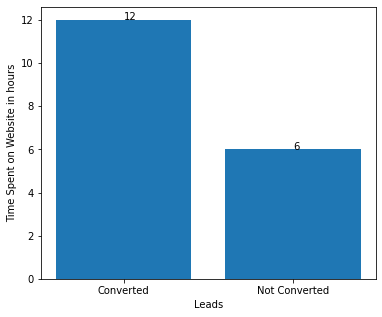

In [22]:
# Plotting
plt.figure(figsize=(6,5))
plt.bar(['Converted', 'Not Converted'], [Converted_time_spent, Not_Converted_time_spent])
plt.annotate(Converted_time_spent, xy=('Converted',Converted_time_spent))
plt.annotate(Not_Converted_time_spent, xy=('Not Converted',Not_Converted_time_spent))
plt.xlabel('Leads')
plt.ylabel('Time Spent on Website in hours')
plt.show()

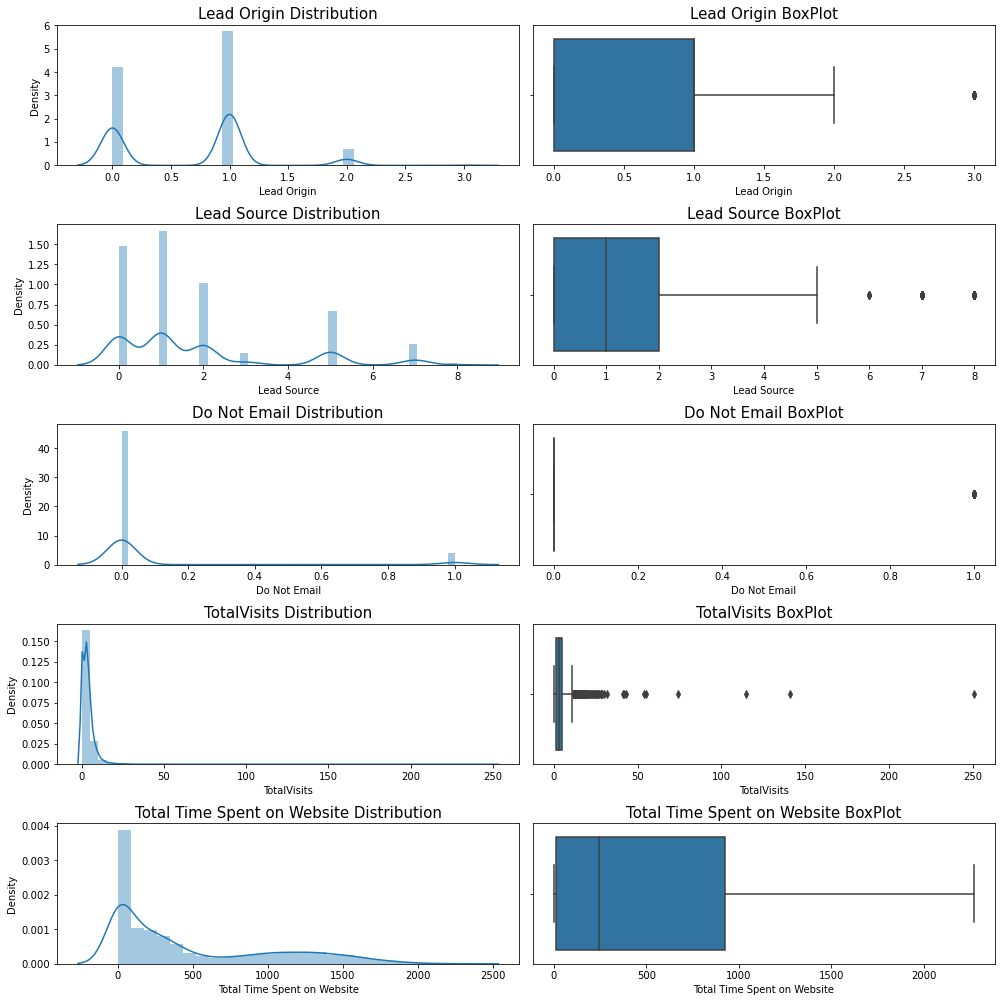

In [23]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(df['Lead Origin'] , ax=axes[0][0])
a.set_title("Lead Origin Distribution",fontsize=15)
a = sns.boxplot(df['Lead Origin'] , orient = "v" , ax=axes[0][1])
a.set_title("Lead Origin BoxPlot",fontsize=15)

a = sns.distplot(df['Lead Source'] , ax=axes[1][0])
a.set_title("Lead Source Distribution",fontsize=15)
a = sns.boxplot(df['Lead Source'] , orient = "v" , ax=axes[1][1])
a.set_title("Lead Source BoxPlot",fontsize=15)

a = sns.distplot(df['Do Not Email'] , ax=axes[2][0])
a.set_title("Do Not Email Distribution",fontsize=15)
a = sns.boxplot(df['Do Not Email'] , orient = "v" , ax=axes[2][1])
a.set_title("Do Not Email BoxPlot",fontsize=15)


a = sns.distplot(df['TotalVisits'] , ax=axes[3][0])
a.set_title("TotalVisits Distribution",fontsize=15)
a = sns.boxplot(df['TotalVisits'] , orient = "v" , ax=axes[3][1])
a.set_title("TotalVisits BoxPlot",fontsize=15)

a = sns.distplot(df['Total Time Spent on Website'] , ax=axes[4][0])
a.set_title("Total Time Spent on Website Distribution",fontsize=15)
a = sns.boxplot(df['Total Time Spent on Website'] , orient = "v" , ax=axes[4][1])
a.set_title("Total Time Spent on Website BoxPlot",fontsize=15)
fig.tight_layout(pad = 1.0)
plt.show()

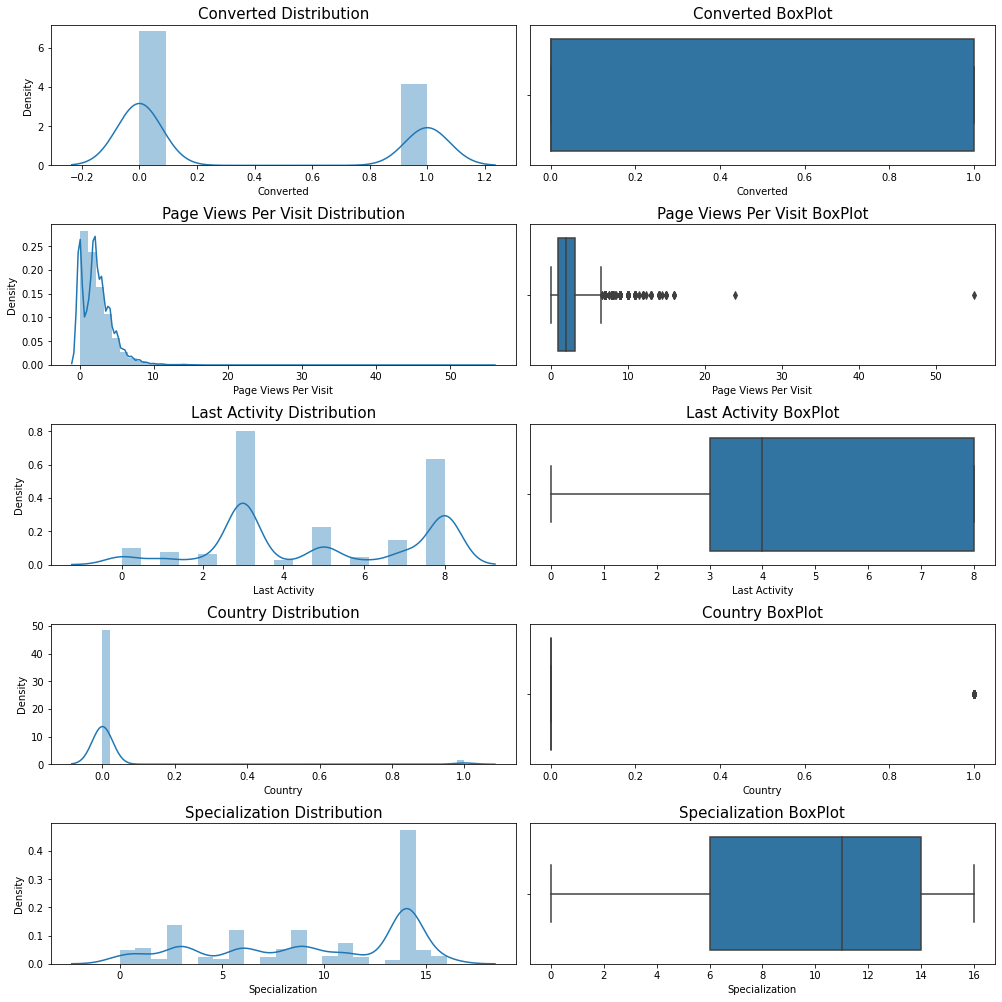

In [24]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(df['Converted'] , ax=axes[0][0])
a.set_title("Converted Distribution",fontsize=15)
a = sns.boxplot(df['Converted'] , orient = "v" , ax=axes[0][1])
a.set_title("Converted BoxPlot",fontsize=15)

a = sns.distplot(df['Page Views Per Visit'] , ax=axes[1][0])
a.set_title("Page Views Per Visit Distribution",fontsize=15)
a = sns.boxplot(df['Page Views Per Visit'] , orient = "v" , ax=axes[1][1])
a.set_title("Page Views Per Visit BoxPlot",fontsize=15)

a = sns.distplot(df['Last Activity'] , ax=axes[2][0])
a.set_title("Last Activity Distribution",fontsize=15)
a = sns.boxplot(df['Last Activity'] , orient = "v" , ax=axes[2][1])
a.set_title("Last Activity BoxPlot",fontsize=15)


a = sns.distplot(df['Country'] , ax=axes[3][0])
a.set_title("Country Distribution",fontsize=15)
a = sns.boxplot(df['Country'] , orient = "v" , ax=axes[3][1])
a.set_title("Country BoxPlot",fontsize=15)

a = sns.distplot(df['Specialization'] , ax=axes[4][0])
a.set_title("Specialization Distribution",fontsize=15)
a = sns.boxplot(df['Specialization'] , orient = "v" , ax=axes[4][1])
a.set_title("Specialization BoxPlot",fontsize=15)
fig.tight_layout(pad = 1.0)
plt.show()

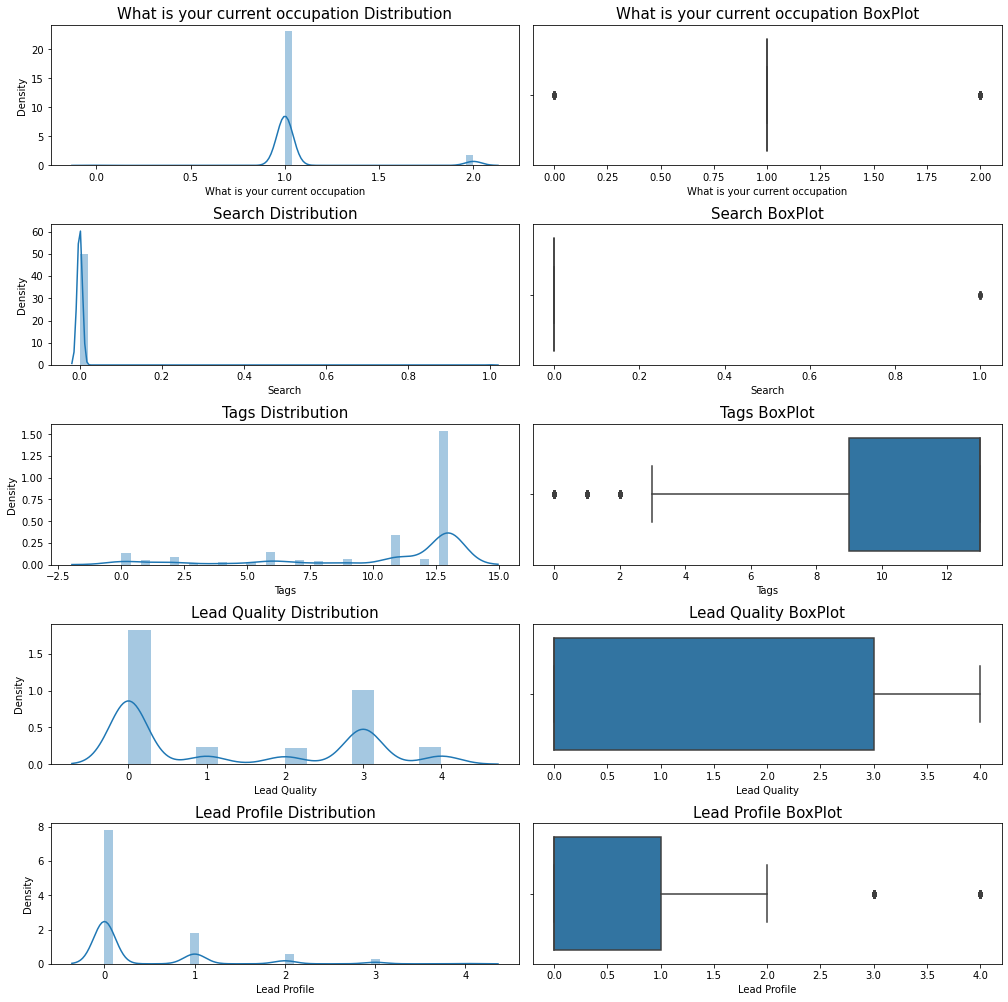

In [25]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(df['What is your current occupation'] , ax=axes[0][0])
a.set_title("What is your current occupation Distribution",fontsize=15)
a = sns.boxplot(df['What is your current occupation'] , orient = "v" , ax=axes[0][1])
a.set_title("What is your current occupation BoxPlot",fontsize=15)

a = sns.distplot(df['Search'] , ax=axes[1][0])
a.set_title("Search Distribution",fontsize=15)
a = sns.boxplot(df['Search'] , orient = "v" , ax=axes[1][1])
a.set_title("Search BoxPlot",fontsize=15)

a = sns.distplot(df['Tags'] , ax=axes[2][0])
a.set_title("Tags Distribution",fontsize=15)
a = sns.boxplot(df['Tags'] , orient = "v" , ax=axes[2][1])
a.set_title("Tags BoxPlot",fontsize=15)


a = sns.distplot(df['Lead Quality'] , ax=axes[3][0])
a.set_title("Lead Quality Distribution",fontsize=15)
a = sns.boxplot(df['Lead Quality'] , orient = "v" , ax=axes[3][1])
a.set_title("Lead Quality BoxPlot",fontsize=15)

a = sns.distplot(df['Lead Profile'] , ax=axes[4][0])
a.set_title("Lead Profile Distribution",fontsize=15)
a = sns.boxplot(df['Lead Profile'] , orient = "v" , ax=axes[4][1])
a.set_title("Lead Profile BoxPlot",fontsize=15)
fig.tight_layout(pad = 1.0)
plt.show()

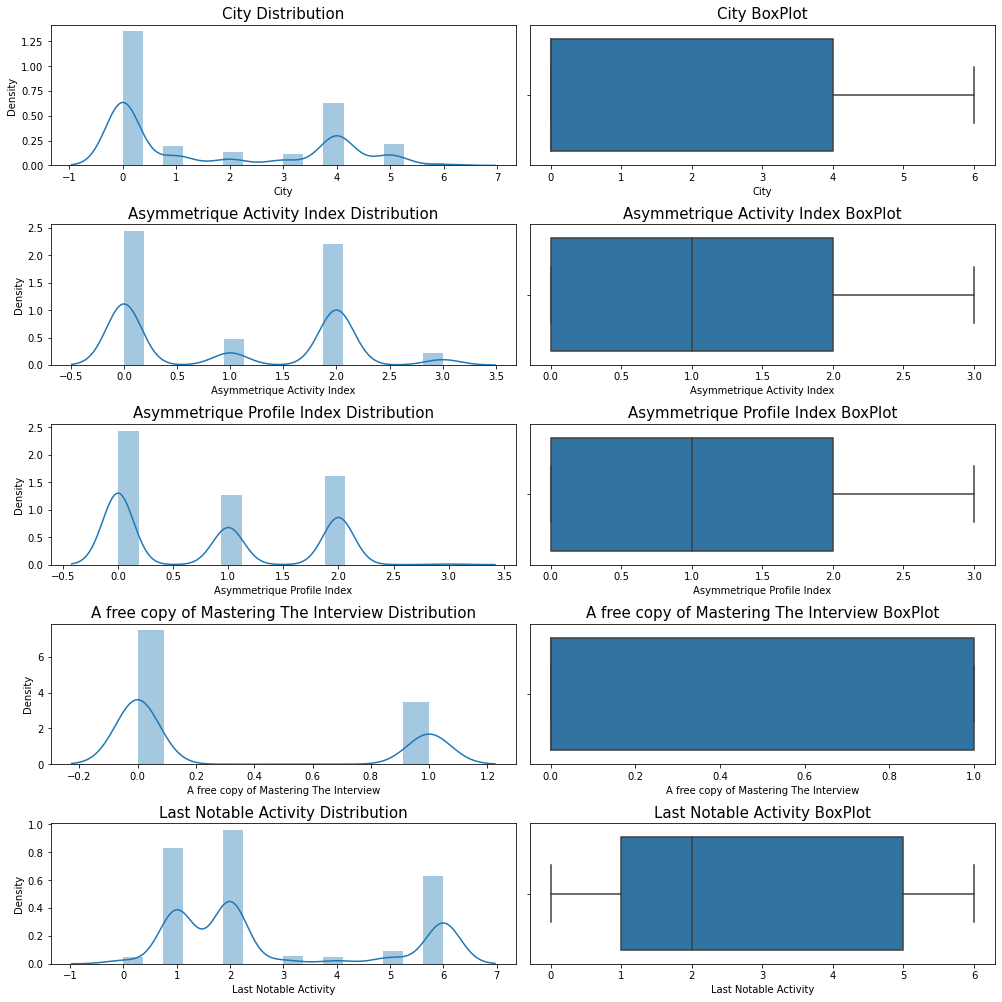

In [26]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(14, 14)
a = sns.distplot(df['City'] , ax=axes[0][0])
a.set_title("City Distribution",fontsize=15)
a = sns.boxplot(df['City'] , orient = "v" , ax=axes[0][1])
a.set_title("City BoxPlot",fontsize=15)

a = sns.distplot(df['Asymmetrique Activity Index'] , ax=axes[1][0])
a.set_title("Asymmetrique Activity Index Distribution",fontsize=15)
a = sns.boxplot(df['Asymmetrique Activity Index'] , orient = "v" , ax=axes[1][1])
a.set_title("Asymmetrique Activity Index BoxPlot",fontsize=15)

a = sns.distplot(df['Asymmetrique Profile Index'] , ax=axes[2][0])
a.set_title("Asymmetrique Profile Index Distribution",fontsize=15)
a = sns.boxplot(df['Asymmetrique Profile Index'] , orient = "v" , ax=axes[2][1])
a.set_title("Asymmetrique Profile Index BoxPlot",fontsize=15)


a = sns.distplot(df['A free copy of Mastering The Interview'] , ax=axes[3][0])
a.set_title("A free copy of Mastering The Interview Distribution",fontsize=15)
a = sns.boxplot(df['A free copy of Mastering The Interview'] , orient = "v" , ax=axes[3][1])
a.set_title("A free copy of Mastering The Interview BoxPlot",fontsize=15)

a = sns.distplot(df['Last Notable Activity'] , ax=axes[4][0])
a.set_title("Last Notable Activity Distribution",fontsize=15)
a = sns.boxplot(df['Last Notable Activity'] , orient = "v" , ax=axes[4][1])
a.set_title("Last Notable Activity BoxPlot",fontsize=15)
fig.tight_layout(pad = 1.0)
plt.show()

# MultiVariate Analysis

In [27]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity'],
      dtype='object')

<AxesSubplot:>

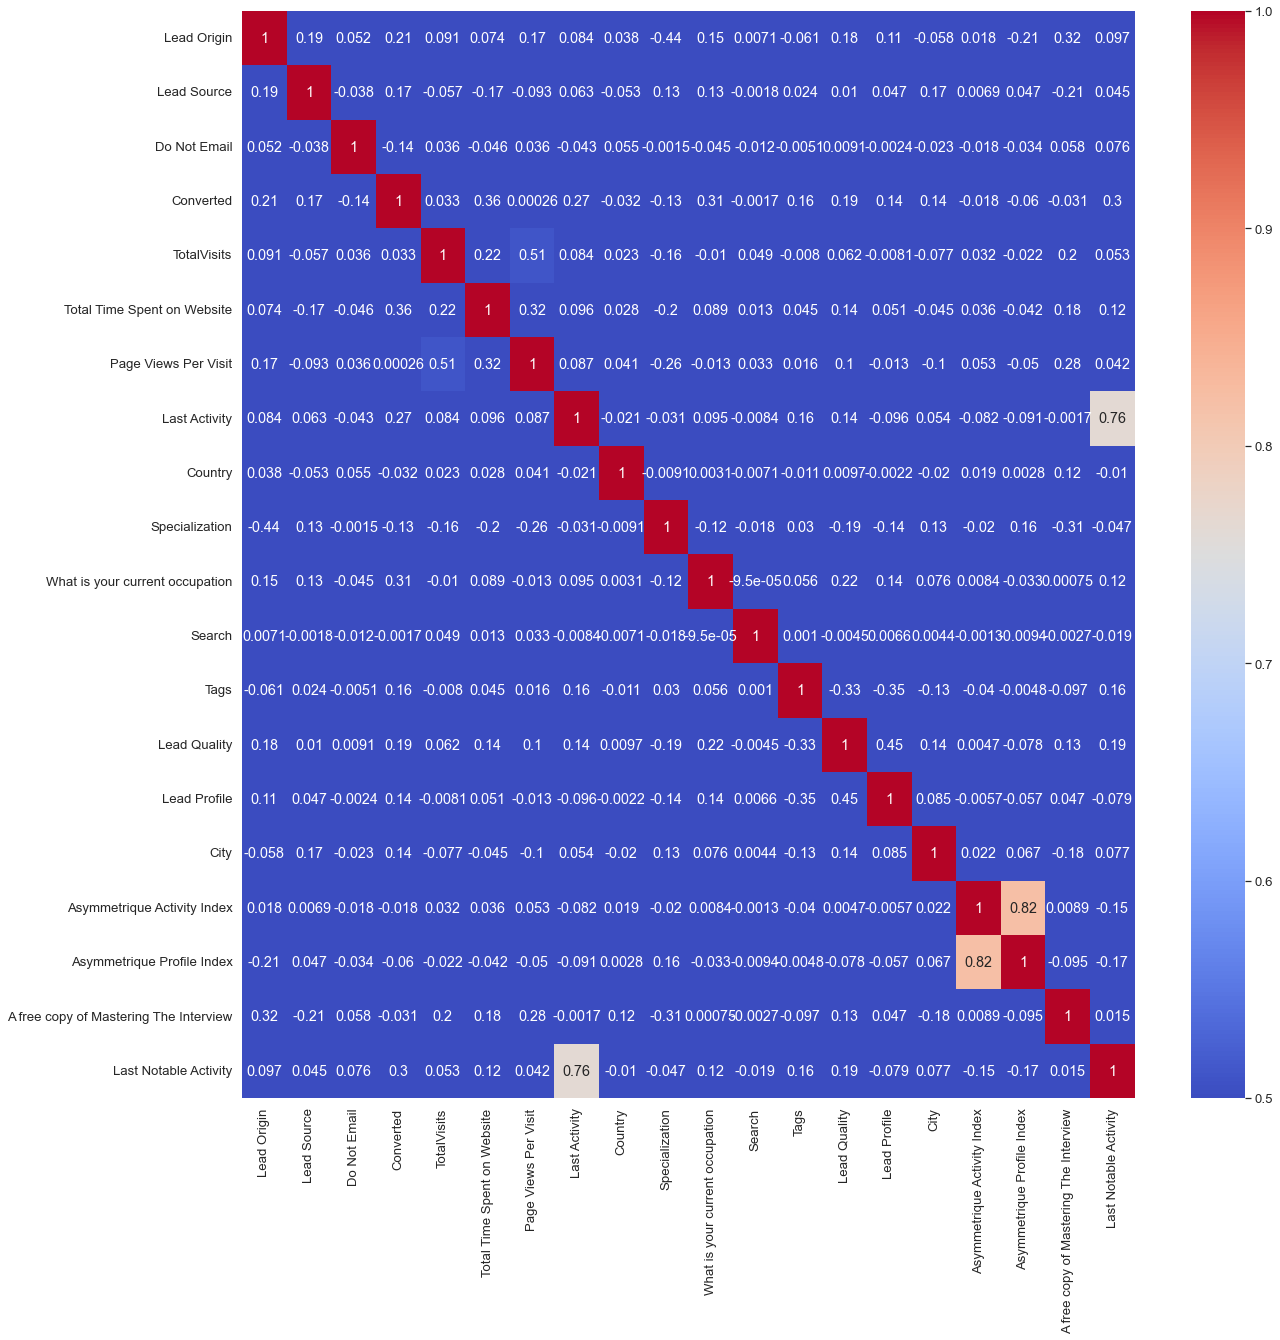

In [28]:
plt.figure(figsize=(20,20))
sns.set(font_scale=1.2)
sns.heatmap(df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Tags', 'Lead Quality',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'A free copy of Mastering The Interview',
       'Last Notable Activity']].corr(),cmap='coolwarm',annot=True,vmin=.5,vmax=1)

<Figure size 1440x1440 with 0 Axes>

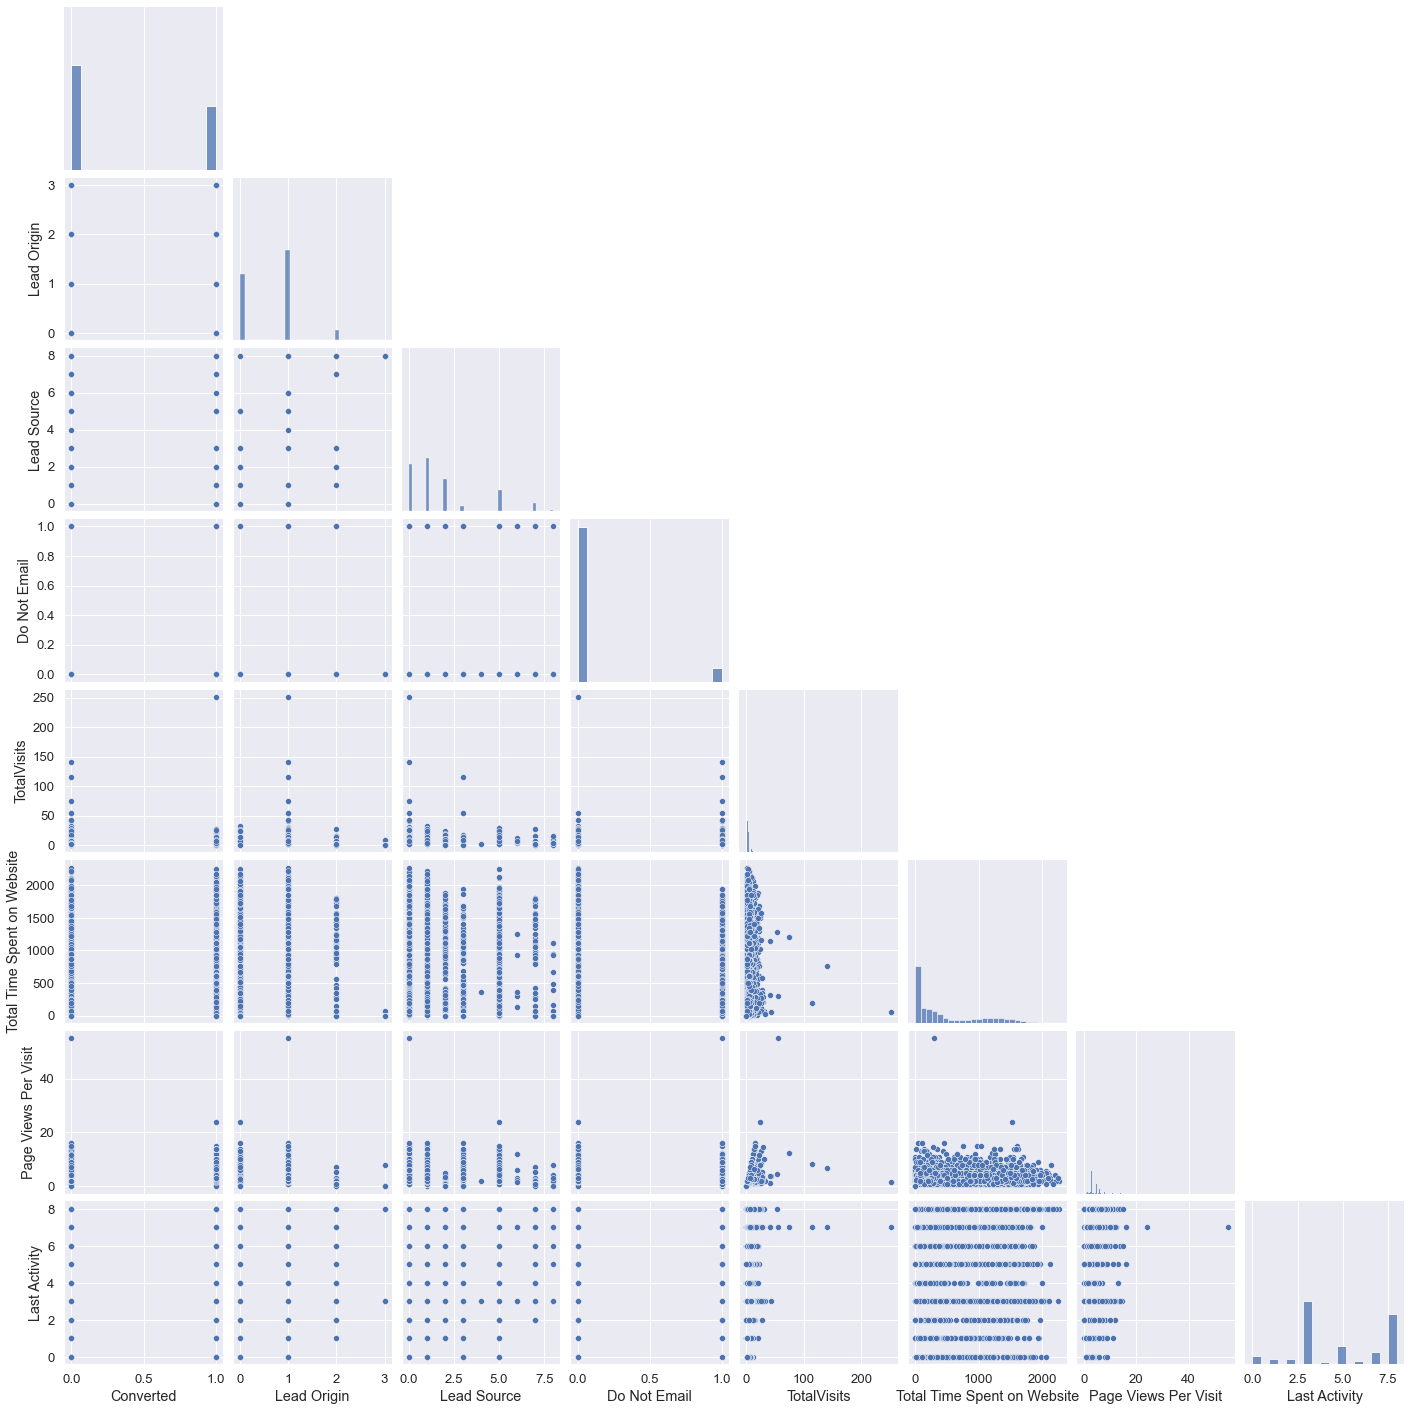

In [29]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['Converted',
                 'Lead Origin', 
                 'Lead Source', 
                 'Do Not Email', 
                 'TotalVisits', 
                 'Total Time Spent on Website', 
                 'Page Views Per Visit',
                 'Last Activity']],corner="True")

<Figure size 1440x1440 with 0 Axes>

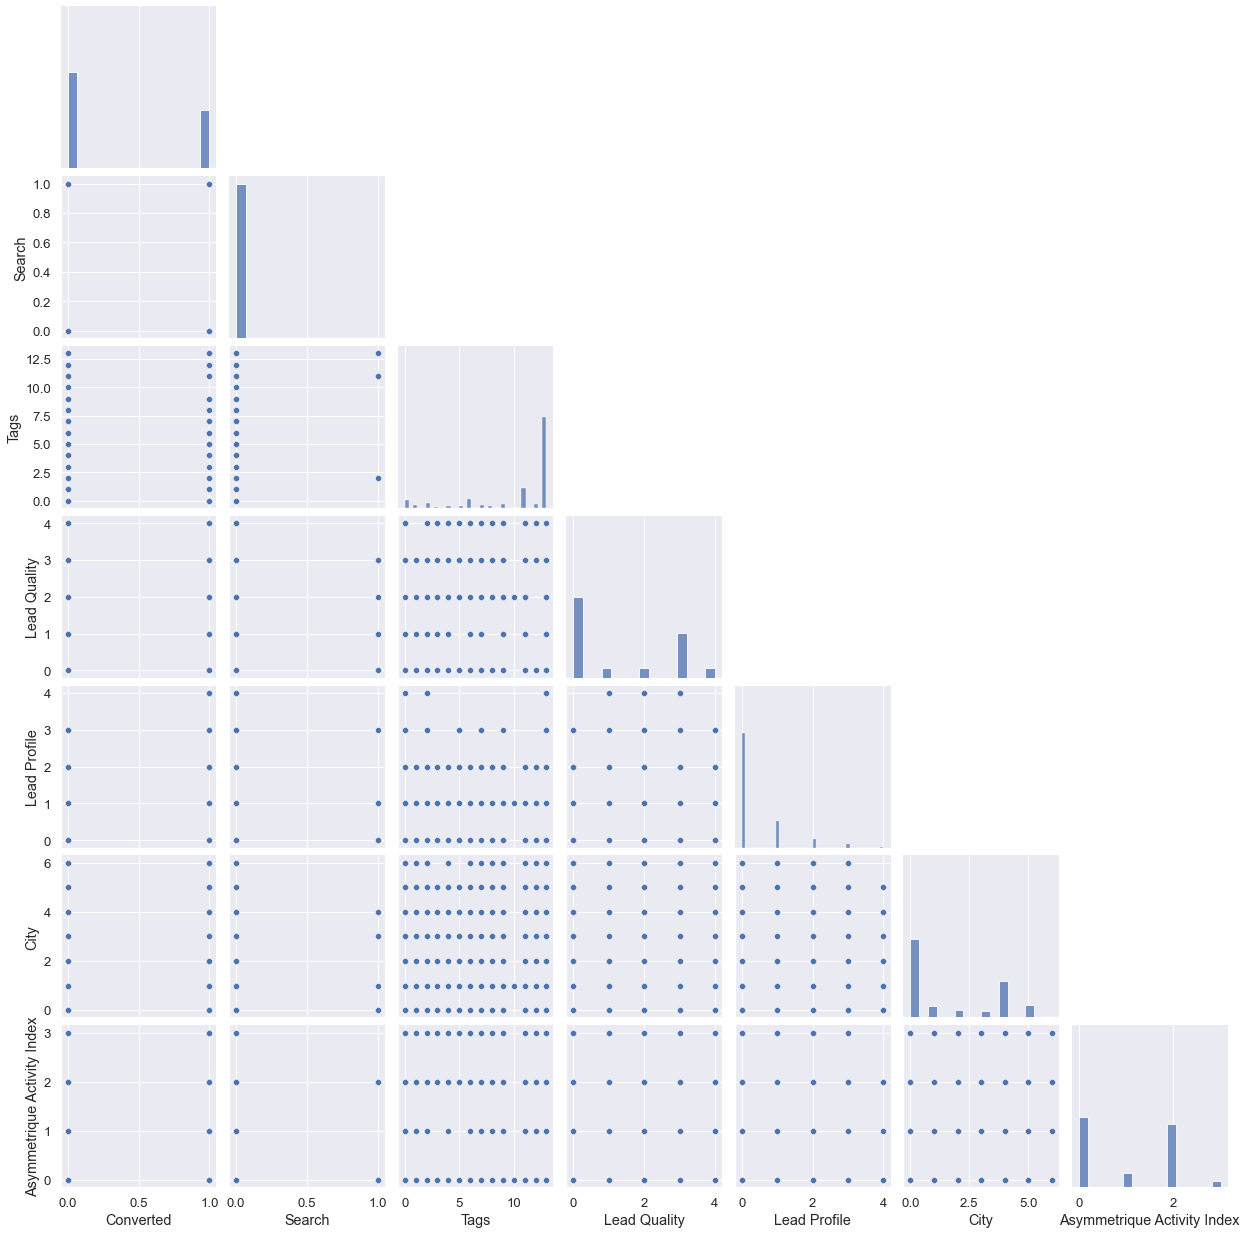

In [30]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['Converted', 
                 'Search', 
                 'Tags', 
                 'Lead Quality',
                 'Lead Profile', 
                 'City', 
                 'Asymmetrique Activity Index']],corner="True")

<Figure size 1440x1440 with 0 Axes>

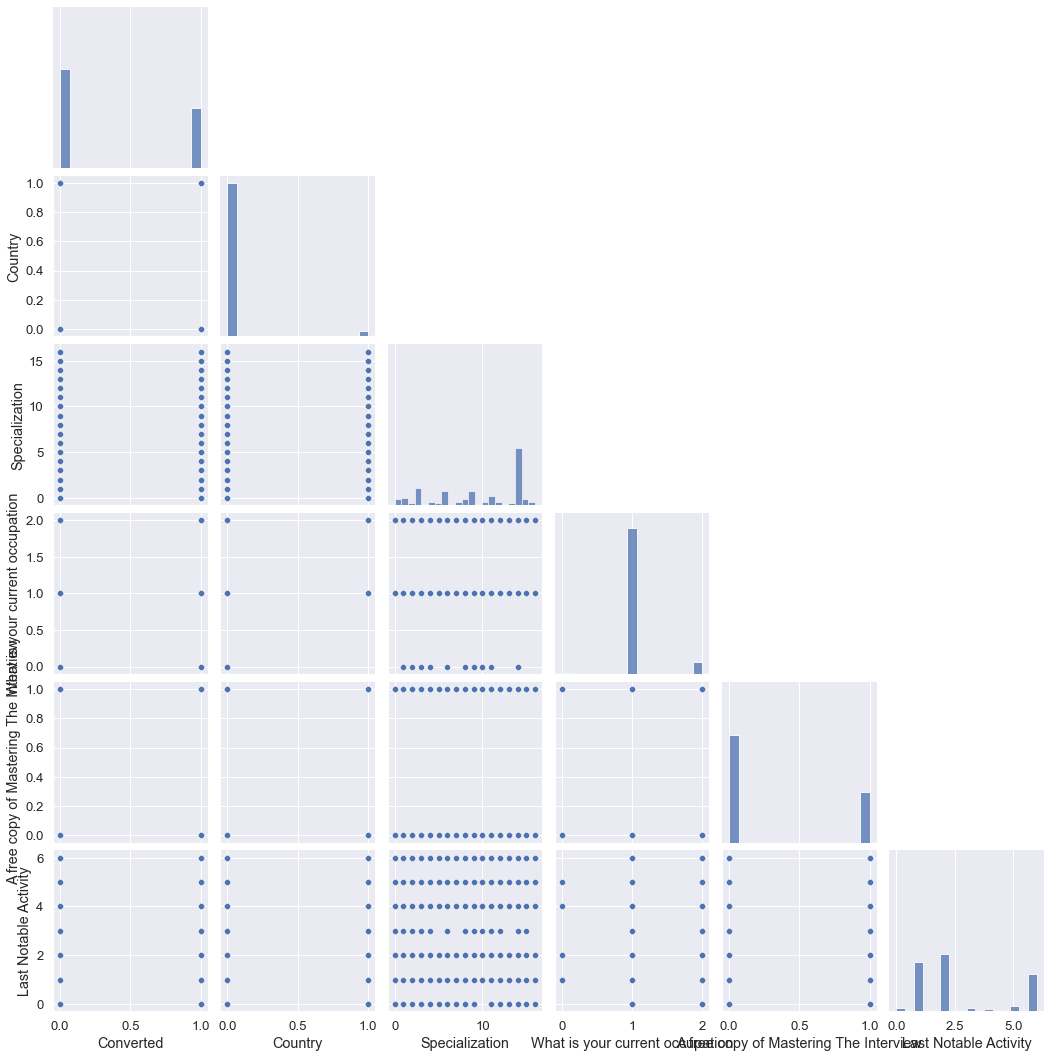

In [31]:
plt.figure(figsize=(20,20))
sns.pairplot(df[['Converted',
                 'Country',
                 'Specialization',
                 'What is your current occupation',
                 'A free copy of Mastering The Interview',
                 'Last Notable Activity']],corner="True")

In [32]:
df.dtypes

Lead Origin                                 int32
Lead Source                                 int32
Do Not Email                                int32
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                               int32
Country                                     int32
Specialization                              int32
What is your current occupation             int32
Search                                      int32
Tags                                        int32
Lead Quality                                int32
Lead Profile                                int32
City                                        int32
Asymmetrique Activity Index                 int32
Asymmetrique Profile Index                  int32
A free copy of Mastering The Interview      int32
Last Notable Activity                       int32


# Outlier Treatment

In [33]:
# Complete the function to calculate lower_range and upper_range
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

# Impute ur and lr to outliers
for feature in df[['TotalVisits','Page Views Per Visit']]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

# Train-Test Split

In [34]:
conversion = (sum(df['Converted'])/len(df['Converted'].index))*100
print(conversion)
# Dropping target variable from df and setting it as y
y = df['Converted']
X = df.drop(['Converted'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

37.85541106458012


# Scaling

In [35]:
scaler = StandardScaler()
X_train[['Lead Origin', 'Lead Source', 
         'TotalVisits','Total Time Spent on Website', 
         'Page Views Per Visit', 'Last Activity',
         'Specialization', 'What is your current occupation',
         'Tags', 'Lead Quality', 'Lead Profile', 'City',
         'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
         'Last Notable Activity']]= scaler.fit_transform(X_train[['Lead Origin', 'Lead Source', 
                                                                  'TotalVisits','Total Time Spent on Website', 
                                                                  'Page Views Per Visit', 'Last Activity',
                                                                  'Specialization', 'What is your current occupation',
                                                                  'Tags', 'Lead Quality', 'Lead Profile', 'City',
                                                                  'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                                                                  'Last Notable Activity']])
X_train.head()

,Lead Origin,Lead Source,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
3009,0.514408,-0.905681,0,-0.431325,-0.160255,-0.161929,-0.738507,0,-1.360899,-0.271516,0,0.624582,-0.875008,-0.500687,-0.870221,-1.014281,-0.974635,1,-0.890790
1012,0.514408,-0.905681,1,-0.431325,-0.540048,-0.161929,-1.523027,0,0.918829,3.428913,0,0.624582,-0.875008,-0.500687,-0.870221,0.955356,0.178263,0,0.597871
9226,-1.116648,0.085356,0,-1.124566,-0.888650,-1.247280,1.222795,0,0.918829,-0.271516,0,0.129608,1.143825,-0.500687,1.164299,-0.029462,1.331160,0,-0.394570
4750,0.514408,-0.905681,0,-0.431325,1.643304,-0.161929,1.222795,0,-0.117411,-0.271516,0,0.624582,-0.875008,-0.500687,-0.361591,-1.014281,-0.974635,0,1.590311
7987,0.514408,-0.905681,0,0.608537,2.017593,0.109409,1.222795,0,-1.360899,-0.271516,0,-0.860339,1.143825,-0.500687,0.147039,0.955356,0.178263,0,-0.394570


# Checking VIF

In [36]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Asymmetrique Profile Index,3.95
15,Asymmetrique Activity Index,3.75
18,Last Notable Activity,2.64
5,Page Views Per Visit,2.52
6,Last Activity,2.50
3,TotalVisits,2.44
0,Lead Origin,1.59
12,Lead Quality,1.53
8,Specialization,1.46
13,Lead Profile,1.39


In [37]:
col = X_train.columns

In [38]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2786.3
Date:                Tue, 15 Nov 2022   Deviance:                       5572.7
Time:                        17:18:21   Pearson chi2:                 6.66e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2915      0.043     -6.738      0.000      -0.376      -0.207
Lead Origin                                0.4498      0.042     10.642      0.000       0.367       0.533
Lead Source                                0.3129      0.038      8.192      0.000       0.238       0.388
Do Not Email                              -1.7572      0.163    -10.793      0.000      -2.076      -1.438
TotalVisits                                0.1750      0.051      3.454      0.001       0.076       0.274
Total Time Spent on Website                0.9995      0.038     26.264      0.000       0.925       1.074
Page Views Per Visit                      -0.5899      0.054    -10.876      0.000      -0.696      -0.484
Last Activity                              0.2435      0.054      4.496      0.000       0.137       0.350
Country                                   -0.2173      0.198     -1.098      0.272      -0.605       0.170
Specialization                            -0.0858      0.040     -2.134      0.033      -0.165      -0.007
What is your current occupation            0.6185      0.048     12.956      0.000       0.525       0.712
Search                                    -0.1798      0.771     -0.233      0.815      -1.690       1.331
Tags                                       0.5789      0.040     14.302      0.000       0.500       0.658
Lead Quality                               0.1654      0.041      4.049      0.000       0.085       0.245
Lead Profile                               0.4045      0.040     10.066      0.000       0.326       0.483
City                                       0.2721      0.035      7.788      0.000       0.204       0.341
Asymmetrique Activity Index               -0.0465      0.065     -0.716      0.474      -0.174       0.081
Asymmetrique Profile Index                 0.0404      0.066      0.607      0.544      -0.090       0.171
A free copy of Mastering The Interview    -0.4743      0.083     -5.718      0.000      -0.637      -0.312
Last Notable Activity                      0.4072      0.054      7.606      0.000       0.302       0.512
==========================================================================================================
"""

##### Variables Country, Search, Asymmetrique Activity Index and Asymmetrique Profile Index are not significant therefore they will be dropped and the model will be fitted again

In [39]:
col = col.drop(['Search','Country','Asymmetrique Activity Index','Asymmetrique Profile Index'], 1)
col

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags',
       'Lead Quality', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2787.2
Date:                Tue, 15 Nov 2022   Deviance:                       5574.5
Time:                        17:18:22   Pearson chi2:                 6.65e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -0.2969      0.043     -6.900      0.000      -0.381      -0.213
Lead Origin                                0.4404      0.040     10.964      0.000       0.362       0.519
Lead Source                                0.3169      0.038      8.367      0.000       0.243       0.391
Do Not Email                              -1.7634      0.163    -10.839      0.000      -2.082      -1.445
TotalVisits                                0.1728      0.050      3.427      0.001       0.074       0.272
Total Time Spent on Website                0.9984      0.038     26.259      0.000       0.924       1.073
Page Views Per Visit                      -0.5922      0.054    -10.949      0.000      -0.698      -0.486
Last Activity                              0.2433      0.054      4.501      0.000       0.137       0.349
Specialization                            -0.0853      0.040     -2.136      0.033      -0.164      -0.007
What is your current occupation            0.6162      0.048     12.935      0.000       0.523       0.710
Tags                                       0.5787      0.040     14.304      0.000       0.499       0.658
Lead Quality                               0.1643      0.041      4.032      0.000       0.084       0.244
Lead Profile                               0.4029      0.040     10.040      0.000       0.324       0.482
City                                       0.2715      0.035      7.788      0.000       0.203       0.340
A free copy of Mastering The Interview    -0.4804      0.082     -5.827      0.000      -0.642      -0.319
Last Notable Activity                      0.4088      0.053      7.732      0.000       0.305       0.512
==========================================================================================================
"""

In [41]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [42]:
y_train_pred[:10]

array([0.14284432, 0.27873339, 0.30223583, 0.88212767, 0.78761078,
       0.86575851, 0.11944744, 0.25278302, 0.80302329, 0.68022902])

In [43]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,ID
0,0,0.142844,3009
1,0,0.278733,1012
2,0,0.302236,9226
3,1,0.882128,4750
4,1,0.787611,7987


In [44]:
y_train_pred_final['Churn_Prob'] = y_train_pred

In [45]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted
0,0,0.142844,3009,0
1,0,0.278733,1012,0
2,0,0.302236,9226,0
3,1,0.882128,4750,1
4,1,0.787611,7987,1


In [46]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
confusion

array([[3450,  455],
       [ 790, 1656]], dtype=int64)

In [47]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8039678790741616


In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6770237121831562

In [50]:
# Let us calculate specificity
TN / float(TN+FP)

0.8834827144686299

In [51]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11651728553137004


In [52]:
# positive predictive value 
print (TP / float(TP+FP))

0.7844623401231644


In [53]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8136792452830188


# Plotting ROC Curve

In [54]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

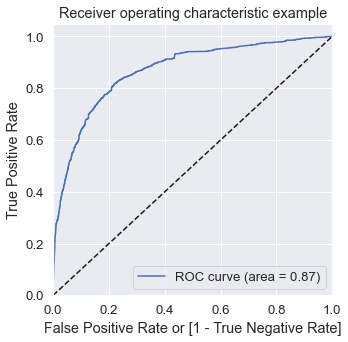

In [55]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

# Optimum cutoff 

In [56]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.142844,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.278733,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302236,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.882128,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.787611,7987,1,1,1,1,1,1,1,1,1,0,0


In [57]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.540545  0.968929  0.272215
0.2   0.2  0.736105  0.896157  0.635851
0.3   0.3  0.787435  0.833197  0.758771
0.4   0.4  0.801449  0.760016  0.827401
0.5   0.5  0.803968  0.677024  0.883483
0.6   0.6  0.789010  0.578496  0.920871
0.7   0.7  0.770902  0.489779  0.946991
0.8   0.8  0.744765  0.385527  0.969782
0.9   0.9  0.702252  0.239575  0.992061


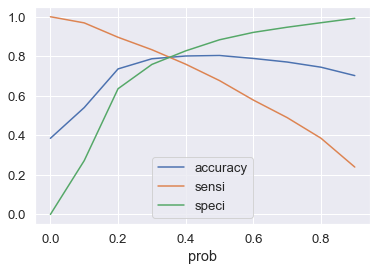

In [58]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### Analysis of the above curve
*Accuracy* - Becomes stable after 0.35

*Sensitivity* - Decreases with the increased probablity.

*Specificity* - Increases with the increasing probablity.

*At point 0.35* where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

So, 0.35 may be the optimal cutoff.

Predicted value with 0.35 probablity cutoff

In [59]:
y_train_pred_final_1 = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final_1['ID'] = y_train.index
y_train_pred_final_1.head()

,Churn,Churn_Prob,ID
0,0,0.142844,3009
1,0,0.278733,1012
2,0,0.302236,9226
3,1,0.882128,4750
4,1,0.787611,7987


In [60]:
y_train_pred_final_1 = y_train_pred_final.copy()

In [61]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.37 else 0
y_train_pred_final_1['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.37 else 0)
y_train_pred_final_1.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.142844,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.278733,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302236,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.882128,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.787611,7987,1,1,1,1,1,1,1,1,1,0,0


### Creating Lead Score
Creating a column called Lead Score by multplying the converted probablity with 100.

Lead Score = (Churn_Prob) X 100

In [94]:
# Creating Lead Score column
y_train_pred_final['Lead Score'] = round((y_train_pred_final['Churn_Prob']*100))
y_train_pred_final.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
0,0,0.142844,3009,0,1,1,0,0,0,0,0,0,0,0,14.0
1,0,0.278733,1012,0,1,1,1,0,0,0,0,0,0,0,28.0
2,0,0.302236,9226,0,1,1,1,1,0,0,0,0,0,0,30.0
3,1,0.882128,4750,1,1,1,1,1,1,1,1,1,1,0,88.0
4,1,0.787611,7987,1,1,1,1,1,1,1,1,1,0,0,79.0


The customers with Lead Score more than 35 will be converted as we decided to have the optimal probablity cutoff is 0.35.

Higher the Lead Score, higher the chance of the customers to be converted.

#### Finding the average Lead Score of the predicted converted leads

In [95]:
# Creating dataframe for predicted converted leads
y_train_pred_converted = y_train_pred_final[y_train_pred_final['predicted']==1]
y_train_pred_converted.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
3,1,0.882128,4750,1,1,1,1,1,1,1,1,1,1,0,88.0
4,1,0.787611,7987,1,1,1,1,1,1,1,1,1,0,0,79.0
5,1,0.865759,1281,1,1,1,1,1,1,1,1,1,1,0,87.0
8,1,0.803023,7536,1,1,1,1,1,1,1,1,1,1,0,80.0
9,0,0.680229,1248,1,1,1,1,1,1,1,1,0,0,0,68.0


In [96]:
# Average Lead Score of the predicted converted leads
avg_converted = round(sum(y_train_pred_converted['Lead Score'])/len(y_train_pred_converted.index))
avg_converted

78

We can see that the average Lead Score of the customers, who were converted is 78.

#### Finding the average Lead Score of the predicted not converted leads

In [97]:
# Creating dataframe for predicted not converted leads
y_train_pred_not_converted = y_train_pred_final[y_train_pred_final['predicted']==0]
y_train_pred_not_converted.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Lead Score
0,0,0.142844,3009,0,1,1,0,0,0,0,0,0,0,0,14.0
1,0,0.278733,1012,0,1,1,1,0,0,0,0,0,0,0,28.0
2,0,0.302236,9226,0,1,1,1,1,0,0,0,0,0,0,30.0
6,0,0.119447,2880,0,1,1,0,0,0,0,0,0,0,0,12.0
7,1,0.252783,4971,0,1,1,1,0,0,0,0,0,0,0,25.0


In [98]:
# Average Lead Score of the predicted not converted leads
avg_not_converted = round(sum(y_train_pred_not_converted['Lead Score'])/len(y_train_pred_not_converted.index))
avg_not_converted

19

We can see that the average Lead Score of the customers, who were not converted is 19.

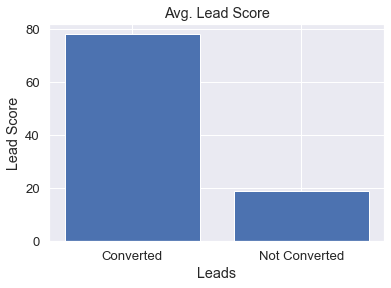

In [99]:
# Bar plot
plt.bar(['Converted', 'Not Converted'], [avg_converted, avg_not_converted])
plt.xlabel('Leads')
plt.ylabel('Lead Score')
plt.title('Avg. Lead Score')
plt.show()

### Confusion Matrix and Accuracy

In [62]:
confusion = metrics.confusion_matrix(y_train_pred_final_1.Churn, y_train_pred_final_1.predicted )
confusion

array([[3166,  739],
       [ 547, 1899]], dtype=int64)

In [63]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final_1.Churn, y_train_pred_final_1.predicted))

0.7975122028027082


In [64]:
TP_1 = confusion[1,1] # true positive 
TN_1 = confusion[0,0] # true negatives
FP_1 = confusion[0,1] # false positives
FN_1 = confusion[1,0] # false negatives

In [65]:
# Let's see the sensitivity of our logistic regression model
TP_1 / float(TP_1+FN_1)

0.776369582992641

In [66]:
# Let us calculate specificity
TN_1 / float(TN_1+FP_1)

0.8107554417413573

In [67]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_1/ float(TN_1+FP_1))

0.18924455825864275


In [68]:
# positive predictive value 
print (TP_1 / float(TP_1+FP_1))

0.71986353297953


In [69]:
# Negative predictive value
print (TN_1 / float(TN_1+ FN_1))

0.8526797737678428


In [70]:
compare = pd.DataFrame(columns=['Metrics','.50','.37'])
compare.Metrics = ['Accuracy','Sensitivity','Specificity','FP Rate','Positive Pred Value Accuracy','Negative Pred Value Accuracy']

In [71]:
compare.loc[0,'.37'] = metrics.accuracy_score(y_train_pred_final_1.Churn, y_train_pred_final_1.predicted)
compare.loc[1,'.37'] =  TP_1 / float(TP_1+FN_1)
compare.loc[2,'.37'] =  TN_1 / float(TN_1+FP_1)
compare.loc[3,'.37'] =  FP_1 / float(TN_1+FP_1)
compare.loc[4,'.37'] =  TP_1 / float(TP_1+FP_1)
compare.loc[5,'.37'] =  TN_1 / float(TN_1+FN_1)

compare.loc[0,'.50'] = metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)
compare.loc[1,'.50'] = TP / float(TP+FN)
compare.loc[2,'.50'] = TN / float(TN+FP)
compare.loc[3,'.50'] = FP / float(TN+FP)
compare.loc[4,'.50'] = TP / float(TP+FP)
compare.loc[5,'.50'] = TN / float(TN+FN)

compare

,Metrics,.50,.37
0,Accuracy,0.803968,0.797512
1,Sensitivity,0.677024,0.77637
2,Specificity,0.883483,0.810755
3,FP Rate,0.116517,0.189245
4,Positive Pred Value Accuracy,0.784462,0.719864
5,Negative Pred Value Accuracy,0.813679,0.85268


In [72]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.6 else 0
y_train_pred_final_2 = y_train_pred_final.copy()
y_train_pred_final_2['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final_2.head()

,Churn,Churn_Prob,ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.142844,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.278733,1012,0,1,1,1,0,0,0,0,0,0,0
2,0,0.302236,9226,0,1,1,1,1,0,0,0,0,0,0
3,1,0.882128,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.787611,7987,1,1,1,1,1,1,1,1,1,0,0


In [74]:
confusion = metrics.confusion_matrix(y_train_pred_final_2.Churn, y_train_pred_final_2.predicted )
confusion

array([[3278,  627],
       [ 627, 1819]], dtype=int64)

In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final_2.Churn, y_train_pred_final_2.predicted))

0.8025507794048181


In [76]:
TP_2 = confusion[1,1] # true positive 
TN_2 = confusion[0,0] # true negatives
FP_2 = confusion[0,1] # false positives
FN_2 = confusion[1,0] # false negatives

In [77]:
# Let's see the sensitivity of our logistic regression model
TP_2 / float(TP_2+FN_2)

0.7436631234668847

In [78]:
# Let us calculate specificity
TN_2 / float(TN_2+FP_2)

0.8394366197183099

In [79]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP_2/ float(TN_2+FP_2))

0.16056338028169015


In [80]:
# positive predictive value 
print (TP_2 / float(TP_2+FP_2))

0.7436631234668847


In [81]:
# Negative predictive value
print (TN_2 / float(TN_2+ FN_2))

0.8394366197183099


In [82]:
compare[".42"] = " "
compare.loc[0,'.42'] = metrics.accuracy_score(y_train_pred_final_2.Churn, y_train_pred_final_2.predicted)
compare.loc[1,'.42'] = TP_2 / float(TP_2+FN_2)
compare.loc[2,'.42'] = TN_2 / float(TN_2+FP_2)
compare.loc[3,'.42'] = FP_2 / float(TN_2+FP_2)
compare.loc[4,'.42'] = TP_2 / float(TP_2+FP_2)
compare.loc[5,'.42'] = TN_2 / float(TN_2+FN_2)

compare

,Metrics,.50,.37,.42
0,Accuracy,0.803968,0.797512,0.802551
1,Sensitivity,0.677024,0.77637,0.743663
2,Specificity,0.883483,0.810755,0.839437
3,FP Rate,0.116517,0.189245,0.160563
4,Positive Pred Value Accuracy,0.784462,0.719864,0.743663
5,Negative Pred Value Accuracy,0.813679,0.85268,0.839437


##### Keeping .5 as the cutoff as we are interested in maximising the accuracy of predicting the positive values. 

# Predicting on Test Set

In [83]:
X_test[['Lead Origin', 'Lead Source', 
         'TotalVisits','Total Time Spent on Website', 
         'Page Views Per Visit', 'Last Activity',
         'Specialization', 'What is your current occupation',
         'Tags', 'Lead Quality', 'Lead Profile', 'City',
         'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
         'Last Notable Activity']]= scaler.transform(X_test[['Lead Origin', 'Lead Source', 
                                                                  'TotalVisits','Total Time Spent on Website', 
                                                                  'Page Views Per Visit', 'Last Activity',
                                                                  'Specialization', 'What is your current occupation',
                                                                  'Tags', 'Lead Quality', 'Lead Profile', 'City',
                                                                  'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
                                                                  'Last Notable Activity']])


X_test = X_test[col]


X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)


# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn_Prob','Converted']]
print (y_pred_final.head())

# Keeping a cutoff of .5 
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

   CustID  Churn_Prob  Converted
0    3271    0.046100          0
1    1490    0.916429          1
2    7936    0.065447          0
3    4216    0.566344          1
4    3830    0.071824          0


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.797282409107602

In [85]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1526,  208],
       [ 344,  645]], dtype=int64)

In [86]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [87]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6521739130434783

In [88]:
# Let us calculate specificity
TN / float(TN+FP)

0.8800461361014994

In [89]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11995386389850057


In [90]:
# positive predictive value 
print (TP / float(TP+FP))

0.7561547479484173


In [91]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8160427807486631


# Final Inferences:

In [92]:
# Performance stable across train and test sets
# Check variable coefficients and list their relation with the target variable here::::*******
# Class 1 in "Converted" can be considered as "Hot Leads"